# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a theoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

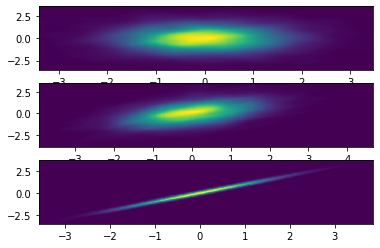

In [4]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.99], [0.99, 1]]), n)
# had to change rho to 0.99, because 1 gave a 'singular matrix' error
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [5]:
# pearsonr - Pearson correlation
# mutual_info_score - MI

def random_mv(rho, n=1000):
    data = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
    return data[:,0], data[:,1]

In [11]:
def pearson_stat(x, y):
    pearson = pearsonr(x, y).statistic
    return pearson

In [12]:
def mi_stat(x, y, bins):
    x_discrete = np.digitize(x, np.linspace(x.min(), x.max(), bins))
    y_discrete = np.digitize(y, np.linspace(y.min(), y.max(), bins))
    mi = mutual_info_score(x_discrete, y_discrete)
    return mi

In [13]:
def pearson_and_mi(rho):
    x, y = random_mv(rho)
    pearson = pearson_stat(x, y)
    mi = mi_stat(x, y, 10)
    return pearson, mi

#### bp 3)

In [14]:
rho_values = np.linspace(0, 0.99, 34)
rho_values

array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
       0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63,
       0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9 , 0.93, 0.96,
       0.99])

In [15]:
pearson_values = []
mi_values = []
for rho in rho_values:
    pearson_total, mi_total = 0, 0
    for N in range(100):
        pearson, mi = pearson_and_mi(rho)
        pearson_total += pearson
        mi_total += mi
    pearson_total /= 100
    mi_total /= 100
    pearson_values.append(pearson_total)
    mi_values.append(mi_total)

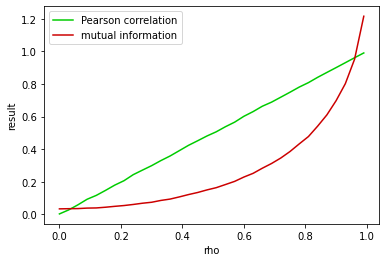

In [16]:
plt.xlabel('rho')
plt.ylabel('result')
plt.plot(rho_values, pearson_values, c='#00cc00')
plt.plot(rho_values, mi_values, c='#cc0000')
plt.legend(['Pearson correlation', 'mutual information'])

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [17]:
mi_theoretical = -np.log(1-rho_values**2)/2
mi_practical = -np.log(1-np.array(pearson_values)**2)/2

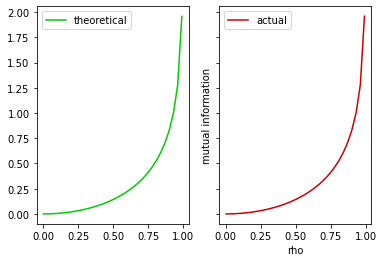

In [18]:
fig, ax = plt.subplots(1, 2, sharey=True)

plt.xlabel('rho')
plt.ylabel('mutual information')
ax[0].plot(rho_values, mi_theoretical, c='#00cc00')
ax[0].legend(['theoretical'])
ax[1].plot(pearson_values, mi_practical, c='#cc0000')
ax[1].legend(['actual'])

The relationship between x and y is quadratic

### b)

#### bp 1)

In [19]:
# again: this is too time consuming so here is an answer

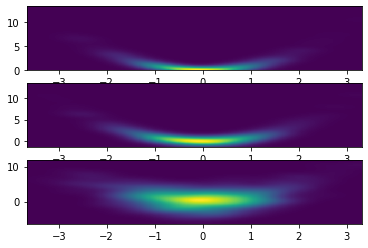

In [20]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [21]:
def random_mv_2(sigma, n=1000):
    data = np.array([x, x**2 + np.random.normal(0, sigma, n)]).T
    return data[:,0], data[:,1]

In [22]:
def pearson_and_mi_2(sigma):
    x, y = random_mv_2(sigma)
    pearson = pearson_stat(x, y)
    mi = mi_stat(x, y, 10)
    return pearson, mi

In [23]:
sigma_values = np.linspace(0, 2, 51)

In [24]:
pearson_values = []
mi_values = []
for sigma in sigma_values:
    pearson_total, mi_total = 0, 0
    for N in range(100):
        pearson, mi = pearson_and_mi_2(sigma)
        pearson_total += pearson
        mi_total += mi
    pearson_total /= 100
    mi_total /= 100
    pearson_values.append(pearson_total)
    mi_values.append(mi_total)

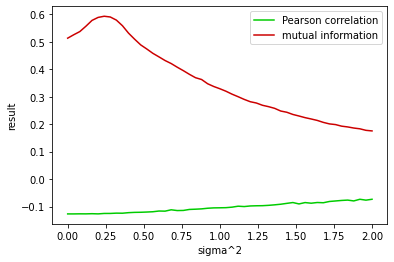

In [25]:
plt.xlabel('sigma^2')
plt.ylabel('result')
plt.plot(sigma_values, pearson_values, c='#00cc00')
plt.plot(sigma_values, mi_values, c='#cc0000')
plt.legend(['Pearson correlation', 'mutual information'])

## Task 2

### a)

In [77]:
def asymptotic_indep_test(x, y, stats, bins=10):
    assert stats in ['mi', 'chi2']
    if stats=='mi':
        mi_estimate = mi_stat(x, y, bins)
        test_stat_value = mi_estimate*2*(x.size)
        df = (bins-1)**2
        p_value = 1-chi2.cdf(test_stat_value, df)
    elif stats=='chi2':
        x_discrete = np.digitize(x, np.linspace(x.min(), x.max(), bins))
        y_discrete = np.digitize(y, np.linspace(y.min(), y.max(), bins))
        contingency_table = np.histogram2d(x_discrete, y_discrete, bins=[list(range(1, bins+1)), list(range(1, bins+1))])
        test_stat_value, p_value, _, _ = chi2_contingency(contingency_table[0])
    
    return test_stat_value, p_value

### b)

In [78]:
def permutation_test(x, y, B, bins=10):
    mi_base = mi_stat(x, y, bins)
    numerator = 1
    denominator = 1+B
    for permutation in range(B):
        x_permuted = np.random.permutation(x)
        mi_permuted = mi_stat(x_permuted, y, bins)
        if mi_base <= mi_permuted:
            numerator += 1
    p_value = numerator/denominator
    return mi_base, p_value

### c)

(assuming $\alpha=0.05$)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [79]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
indep_x, indep_y = random_mv(0)

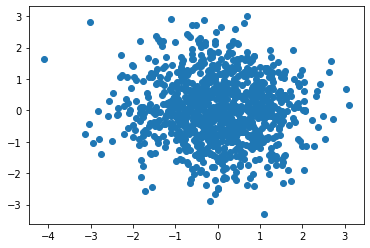

In [89]:
plt.scatter(indep_x, indep_y)

In [80]:
asymptotic_indep_test(indep_x, indep_y, 'mi')

(67.1461161598006, 0.8652818082860982)

In [81]:
asymptotic_indep_test(indep_x, indep_y, 'chi2')

(64.62002639899826, 0.4547976197733038)

In [88]:
permutation_test(indep_x, indep_y, 20)

(0.0335730580799003, 0.38095238095238093)

Null hypothesis not rejected

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [83]:
# independent r.v. - ideally we will reject the null hypothesis
dep_x, dep_y = random_mv(0.99)

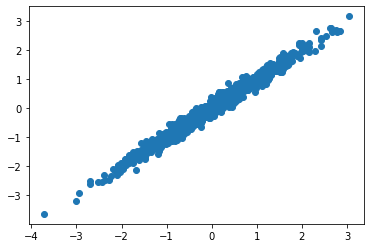

In [90]:
plt.scatter(dep_x, dep_y)

In [84]:
asymptotic_indep_test(dep_x, dep_y, 'mi')

(2300.3484172475723, 0.0)

In [85]:
asymptotic_indep_test(dep_x, dep_y, 'chi2')

(5130.265796199036, 0.0)

In [87]:
permutation_test(dep_x, dep_y, 20)

(1.1501742086237863, 0.047619047619047616)

Null hypothesis rejected